# A Python Quick Start Tutorial - Part 8

## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

# User Interface (UI) with PyQt5

Graphical user interfaces (GUI) are the perfect application of object oriented programming (OOP).
Simply think of every element you've seen in various software applications as instances of a class:
* Push button
* Check box
* Radio box
* Text box
* Combo box (Pull-down menu)

You should view an entire graphical user interface as a complex object with the following responsibilities:
1. Display/repaint the UI in various sizes.
* Collect user input through keyboard and mouse action.
* Connect user directives to desired actions.

It is good practice to reparate actual computations (a **worker** class) from the UI.  Moreover, the main routine should provide or serve as a **driver** that coordinates interaction between UI and worker(s).  In simple applications, the driver is often part of the UI.


## A first UI

In this course, we shall use the Qt5 library to build our UIs.  Qt5 is a comprehensive set of graphical and data objects that enable us to build most applications.  The best way of learning UI is to give it a try:
1. start the code by importing those classes which we intent to use.
* create an application object (ONE ONLY!)
* create a graphics object: here a QWidget(), but there are many more.
* start the event loop (to handle user input)

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget

def main():
    app = QApplication(sys.argv)
    w = QWidget()
    w.setWindowTitle('simple window')
    w.show()
    sys.exit(app.exec_())

main()

This code created and started a blank window. (You may find it behind yuor browser!).  

Next, let's make the app more interesting by adding a few elements

In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel

class MyWidget(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.initUI()
        
    def initUI(self):
        self.resize(400,200)
        lbl = QLabel("Hello, World!",self)
        lbl.move(20,20)
        
def main():
    a = QApplication(sys.argv)
    w = MyWidget()
    w.setWindowTitle('simple window')
    w.show()
    sys.exit(a.exec_())
    
main()

SystemExit: 0

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


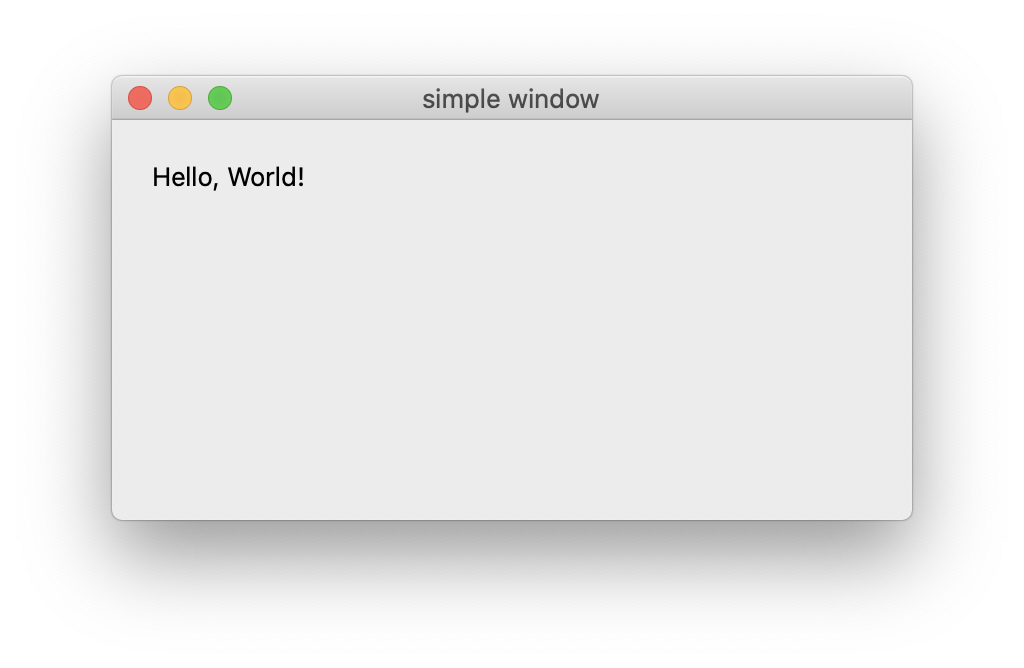

Try resizing the above application window.  Notice that the label will be fixed relative to th eorigin (the upper left corner).  What if we want the label to be centered?  We would need to do the following:
1. find the size of the window (the Widget)
2. find the size of the label
3. compute the proper position of the label's upper left corner relative to the origin
4. move the label to that position
5. redraw the application with those settings

That process needs to be repeated every time a window moves or gets resized or changes focus (hiddien by other application and revealed again).  Luckily, this task is so common that Qt5 provides a convenient helper class for it: QBoxLayout (QHBoxLayout, QVBoxLaoyout, QGridLayout).

In [ ]:
import sys
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QVBoxLayout

class MyWidget(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.initUI()
        
    def initUI(self):
        self.resize(400,200)
        lbl = QLabel("Hello, World!\n(try resizing this app)",self)
        lbl.setAlignment(Qt.AlignHCenter|Qt.AlignVCenter)
        
        lyt=QVBoxLayout(self)
        lyt.addWidget(lbl)
        
def main():
    a = QApplication(sys.argv)
    w = MyWidget()
    w.setWindowTitle('simple window')
    w.show()
    sys.exit(a.exec_())
    
main()

The QVBoxLayout object does not deisplay any graphic, it solely manages the ideal size and position of objects under its control.  The constructor 
~~~
lyt=QVBoxLayout(self)
~~~
Not only creates a Layout object, it also informs it to obtain the **available size** from self, i.e., **this Widget**.  Alternatively, one may create the object without the argument and, later, tell this (or another) widget to use that layout:
~~~
lyt=QVBoxLayout()
self.setLayout(lyt)
~~~
**DO NOT combine those two options!**

In [2]:
import sys
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( 
    QApplication, QWidget, QLabel, QLineEdit, QPushButton,
    QVBoxLayout, QHBoxLayout
)

class MyWidget(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.initUI()
        
    def initUI(self):
        self.resize(400,120)
        
        # the vertical layout
        lyt=QVBoxLayout(self)
        lyt.addWidget(QLabel("Enter Your Information",self))
        
        # create a horizontal layout for a single line
        hbox = QHBoxLayout()   # note: no self for it must not take the Widget size
        hbox.addWidget(QLabel("First name:"))   # the parent is an optional second argument to help python with cleanup
        txtIn1 = QLineEdit(self)
        hbox.addWidget(txtIn1)
        
        # now add that line to the vertical layout
        lyt.addLayout(hbox)
        
        # add a push button
        btn = QPushButton("done")
        lyt.addWidget(btn)
        
def main():
    a = QApplication(sys.argv)
    w = MyWidget()
    w.setWindowTitle('simple window')
    w.show()
    sys.exit(a.exec_())
    
main()

SystemExit: 0

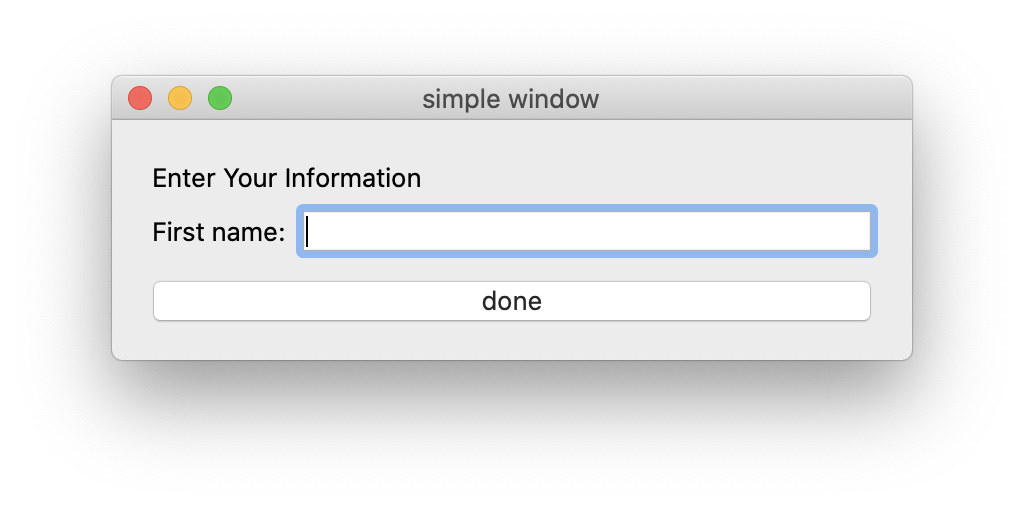

### Adding actions

Once your UI displays and scales nicely, it is time to add actions in response to user input.  
The strategy is as follows:
1. Every widget in Qt5 emits a SIGNAL for specific user input (clicked, triggered, changed, edited, ...) 
* create one callback function for every action any user input should trigger.  
  Qt5 calls such a function SLOT. These are methods in your UI class.
* connect respective SIGNALS to SLOTS: which SIGNAL from what object shall initiate what callback function.

In [ ]:
import sys
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( 
    QApplication, QWidget, QLabel, QLineEdit, QPushButton,
    QVBoxLayout, QHBoxLayout
)

class MyWidget(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.initUI()
        
    def initUI(self):
        self.resize(400,120)
        
        # the vertical layout
        lyt=QVBoxLayout(self)
        title = QLabel("Simple button test with callback",self)
        title.setStyleSheet("color: red; font: 20pt bold")
        lyt.addWidget(title)
        
        # create a horizontal layout for a single line
        hbox = QHBoxLayout()   # note: no self for it must not take the Widget size
        hbox.addWidget(QLabel("Button test:"))   # the parent is an optional second argument to help python with cleanup
        self.info = QLineEdit(self)
        self.info.setText("try clicking the button")
        self.state = False
        hbox.addWidget(self.info)
        
        # now add that line to the vertical layout
        lyt.addLayout(hbox)
        
        # create another horizontal layout for a single line
        hbox = QHBoxLayout()   # note: no self for it must not take the Widget size
        
        # add a toggle button
        btn1 = QPushButton("toggle")
        hbox.addWidget(btn1)
        
        # add a quit button
        btn2 = QPushButton("quit")
        hbox.addWidget(btn2)
        
        lyt.addStretch(1)
        lyt.addLayout(hbox)
        
        # add connections
        btn1.clicked.connect(self.on_toggle_button_clicked)
        btn2.clicked.connect(self.close)  # this connects to a QWidget standard function
        
    # this is our callback function
    def on_toggle_button_clicked(self):
        if self.state:
            self.info.setText("try clicking the button")
        else:
            self.info.setText("button clicked :)")
        self.state = not self.state
        
def main():
    a = QApplication(sys.argv)
    w = MyWidget()
    w.setWindowTitle('simple window')
    w.show()
    sys.exit(a.exec_())
    
main()

## Dressing up the application

A real application usually needs a few more parts:
* menus with additional functions
* status bar to display quick info ar feedback

Qt5 offers one class that provides all this: QMainWindow

In [ ]:
import sys
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( 
    QApplication, qApp, QMainWindow,
    QAction,
    QWidget, QLabel, QLineEdit, QPushButton,
    QVBoxLayout, QHBoxLayout,
    QMessageBox
)
from PyQt5.QtGui import QIcon

# loading the MyWidget definition from a file (to keep this example neat)
from MyWidget import *

# moving longer messages outside the code for better readability
aboutText =\
"""
This is a basic application example
using PyQt5.  

written for the

NHERI-SimCenter

by:
Peter Mackenzie-Helnwein
University of Washington
Seattle, WA
"""
                      
# defining the actual app
class MyApp(QMainWindow):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.setWindowTitle('a simple application')
        self.initUI()
        self.show()
        
    def initUI(self):
        self.resize(640,480)
        
        # put an instance of MyWidget (the previous example) into the application
        # QMainWindow has a reserved space for a **CentralWidget**, that you have to set
        self.setCentralWidget(MyWidget(self))
        
        # build a file menu
        exitAct = QAction(QIcon('exit.png'), '&Exit', self)
        exitAct.setShortcut('Ctrl+Q')
        exitAct.setStatusTip('Exit application')
        exitAct.triggered.connect(qApp.quit)

        openAct = QAction(QIcon('open.png'), '&Open', self)
        openAct.setShortcut('Ctrl+O')
        openAct.setStatusTip('Open file')
        openAct.triggered.connect(self.on_file_open)

        menubar = self.menuBar()
        fileMenu = menubar.addMenu('&File')
        fileMenu.addAction(exitAct)
        fileMenu.addAction(openAct)

        # activate the status bar (bottom of the app)
        self.statusBar()
        
        # build a help menu
        aboutAct = QAction(QIcon('about.png'), '&About', self)
        aboutAct.setStatusTip('about this app')
        aboutAct.triggered.connect(self.on_about)
        
        helpMenu = menubar.addMenu('&Help')
        helpMenu.addAction(aboutAct)
        
        # connect the close_button in MyWidget to the close() method in MyApp
        ##self.centralWidget().close_button.clicked.connect(QApplication.instance().quit)
        self.centralWidget().close_button.clicked.connect(self.close)

    def on_file_open(self):
        self.statusBar().showMessage("WARNING: we need a file open method")
        
    def on_about(self):
        msgBox = QMessageBox()
        msgBox.setIcon(QMessageBox.Information)
        msgBox.setText(aboutText)
        msgBox.setWindowTitle("QMessageBox Example")
        msgBox.setStandardButtons(QMessageBox.Ok | QMessageBox.Cancel)
        #msgBox.buttonClicked.connect(self.on_msgButton_clicked)

        returnValue = msgBox.exec()
        if returnValue == QMessageBox.Ok:
            self.statusBar().showMessage('OK clicked')
        if returnValue == QMessageBox.Cancel:
            self.statusBar().showMessage('Cancel clicked')
        
# setting up the main executaion function
def main():
    a = QApplication(sys.argv)
    w = MyApp()
    sys.exit(a.exec_())

    
# running the app
main()

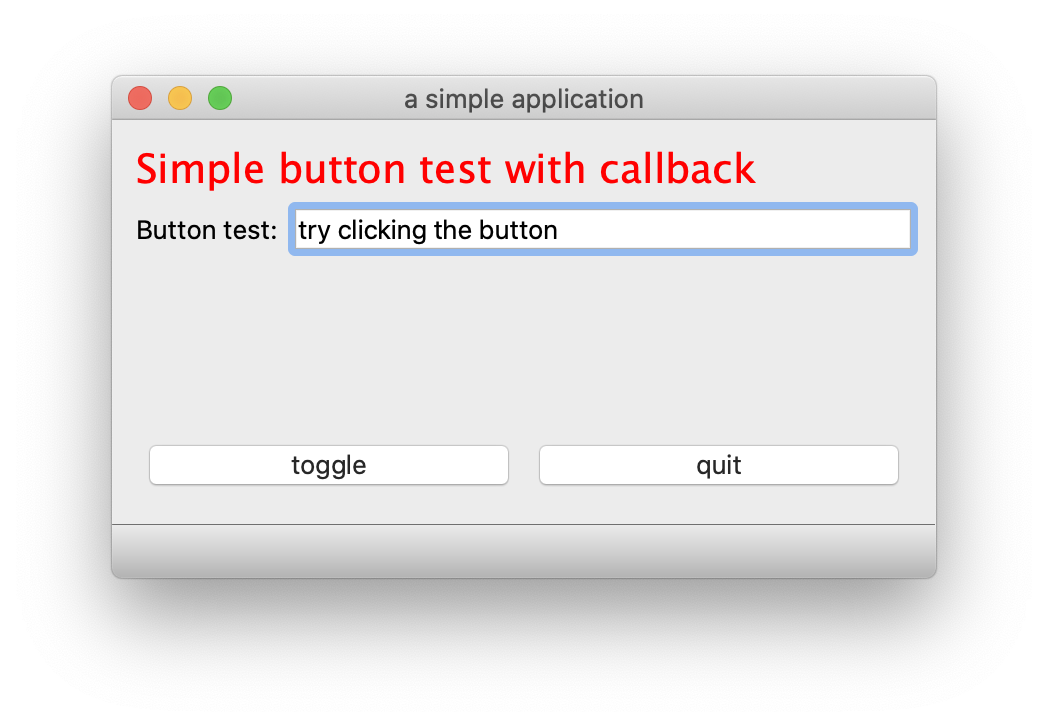
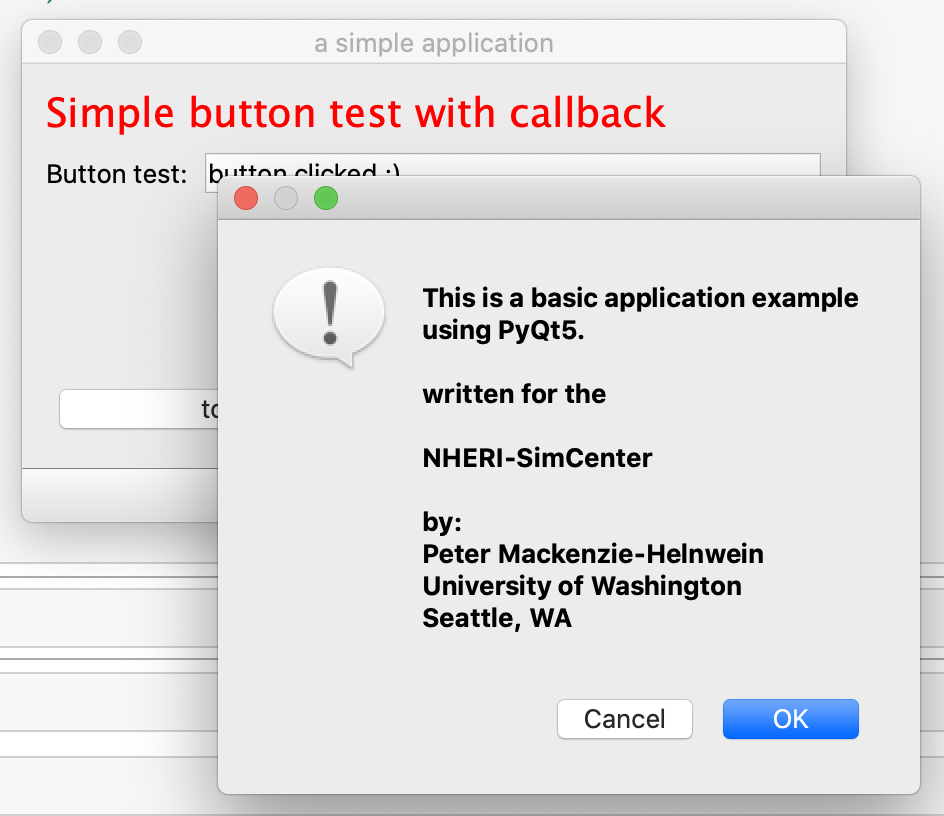

## Tips and Tricks

Here are a few quick hints that can help you design and build a useful UI
1. Start drawing your ideas on a piece of paper BEFORE even opening the computer.  Make at least three alternative layouts and play out the user interaction yourself or ask a friend to try if they can figure out how to use this UI.  It is way less work modifying a drawing than modifying your code! 
* Keep graphics in one class, the actual work in another.  This aids collaboration and makes modifications easier.
* ALL objects in your UI should be created by the constructor/a function called only by the constructor.  Use show()/hide() or enable()/disable() instead of deleting and creating objects at runtime.

<hr>

[Jump to chapter 7: Machine learning](./07%20Machine%20Learning%20AI.ipynb)

[Jump to chapter 9: Databases](./09%20SQL%20Databases.ipynb)

[Back to the outline](./00%20Outline.ipynb)